# Titanic

##### Predict survival on the Titanic

In [42]:
feature = {'survived':'Survival (0 = No, 1 = Yes)',
            'pclass':'Ticket class (1 = Upper, 2 = Middle, 3 = Lower)',
            'sex':'Sex','Age':'Age in years',
            'sibsp':'# of siblings / spouses aboard the Titanic',
            'parch':'# of parents / children aboard the Titanic',
            'ticket':'Ticket number',
            'fare':'Passenger fare',
            'cabin':'Cabin number',	
            'embarked':	'Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)'}

## `Importing Required Libraries`

In [389]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score
import pickle
import warnings
warnings.filterwarnings("ignore")

## `Load Data`

In [44]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## `Exploratory Data Analysis`

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
#Colors to be used in the plots
color=sns.color_palette("Set2")

- There are total 891 rows and 12 columns.
- `Age`, `cabin` and `Embarked` are the features having missing values. Cabin having approx 78% missing values.
- No issues with the data type of the columns.

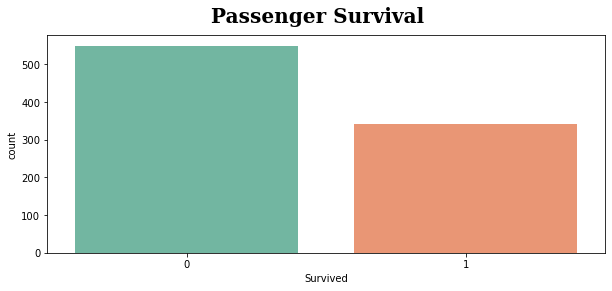

In [47]:
fig = plt.figure(figsize = (10,4))
fig.suptitle('Passenger Survival', family='Serif', weight='bold', size=20)
sns.countplot(x = 'Survived', data = df,palette=color)
plt.show()

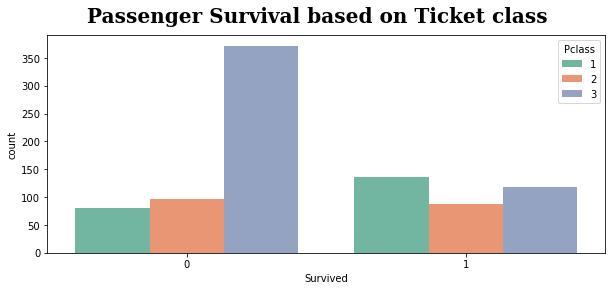

In [48]:
fig = plt.figure(figsize = (10,4))
fig.suptitle('Passenger Survival based on Ticket class', family='Serif', weight='bold', size=20)
sns.countplot(x = 'Survived', data = df, hue = 'Pclass',palette=color)
plt.show()

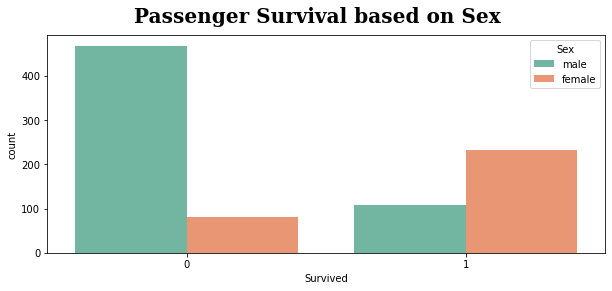

In [49]:
fig = plt.figure(figsize = (10,4))
fig.suptitle('Passenger Survival based on Sex', family='Serif', weight='bold', size=20)
sns.countplot(x = 'Survived', data = df, hue = 'Sex', palette=color)
plt.show()

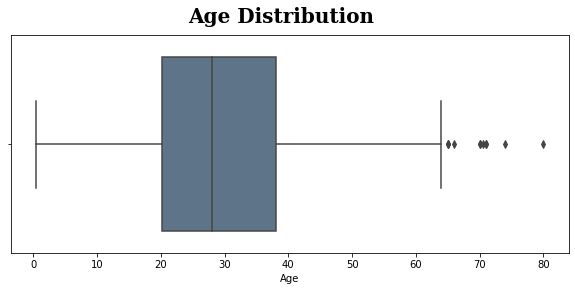

In [1002]:
fig = plt.figure(figsize = (10,4))
fig.suptitle('Age Distribution', family='Serif', weight='bold', size=20)
sns.boxplot(x = df['Age'], color= '#577590')
plt.show()

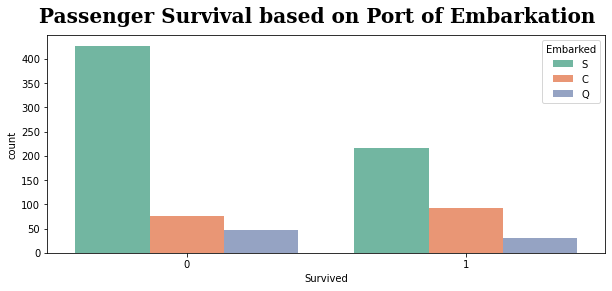

In [51]:
fig = plt.figure(figsize = (10,4))
fig.suptitle('Passenger Survival based on Port of Embarkation', family='Serif', weight='bold', size=20)
sns.countplot(x = 'Survived', data = df, hue = 'Embarked', palette=color)
plt.show()

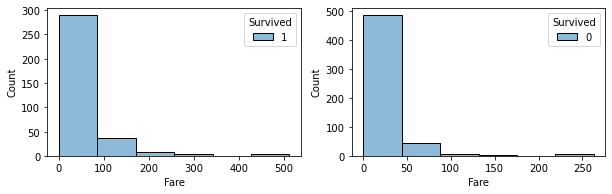

In [1006]:
fig = plt.figure(figsize = (10,6))
plt.subplot(2,2,1)
# fig.suptitle('Passenger Survival based on Port of Embarkation', family='Serif', weight='bold', size=20)
sns.histplot(x = 'Fare', data = df[df['Survived'] == 1], bins = 6, hue = 'Survived')
plt.subplot(2,2,2)
sns.histplot(x = 'Fare', data = df[df['Survived'] == 0], bins = 6, hue = 'Survived')
plt.show()

## `Preprocessing`

In [53]:
df['Survived'].value_counts()   # Imbalanced Class

0    549
1    342
Name: Survived, dtype: int64

In [54]:
# Lets Segregate numeric and object columns

numeric_cols = df.select_dtypes(include = 'number').columns.to_list()
print(f'Numeric Columns: {numeric_cols}')

numeric_cols = df.select_dtypes(exclude = 'number').columns.to_list()
print(f'Object Columns: {numeric_cols}')

Numeric Columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Object Columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


- We can drop feature `Name`, `PassengerId` and `Ticket`.
- Featre `Cabin` is also having approx 78% missing values and we dont't have any procedure to impute these values. So we will drop this feature.

In [55]:
# Lets make a copy of original DataFrame

df_copy = df.copy(deep=True)

In [56]:
df_copy.drop(['Name','PassengerId','Ticket','Cabin'],axis = 'columns', inplace = True)
df_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


- We will perform Label encoding for feature `Sex` and `Embarked`

In [57]:
encoder = LabelEncoder()

In [58]:
df_copy['Sex'] = encoder.fit_transform(df_copy['Sex'])
df_copy['Embarked'] = encoder.fit_transform(df_copy['Embarked'])

In [59]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [60]:
df_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


- We will try to fill missing values in `Age` with mean value

In [61]:
df_copy['Age'].fillna(df_copy['Age'].mean(), inplace=True)

In [62]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


- We will preform MinMax scaling for feature `Fare` and `Age`

In [63]:
scaling = MinMaxScaler()

In [64]:
for col in df_copy.columns:
    df_copy[col] = scaling.fit_transform(df_copy[[col]])

In [65]:
df_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,1.0,1.0,0.271174,0.125,0.0,0.014151,0.666667
1,1.0,0.0,0.0,0.472229,0.125,0.0,0.139136,0.000000
2,1.0,1.0,0.0,0.321438,0.000,0.0,0.015469,0.666667
3,1.0,0.0,0.0,0.434531,0.125,0.0,0.103644,0.666667
4,0.0,1.0,1.0,0.434531,0.000,0.0,0.015713,0.666667


## `Modeling`

### `Logistic Regression`

In [901]:
x = df_copy.iloc[:,1:]
y = df_copy['Survived']

In [911]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

In [914]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8, random_state=89)
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(x_train,y_train)

LogisticRegression(class_weight='balanced')

In [915]:
y_pred_train = log_reg.predict(x_train)
y_pred_test = log_reg.predict(x_test)
logistic_reg_f1_train = f1_score(y_train,y_pred_train)
logistic_reg_f1_test = f1_score(y_test,y_pred_test)
print(f'Training F1 score: {logistic_reg_f1_train}')
print(f'Testing F1 score: {logistic_reg_f1_test}')

Training F1 score: 0.7266553480475382
Testing F1 score: 0.7391304347826088


<AxesSubplot:>

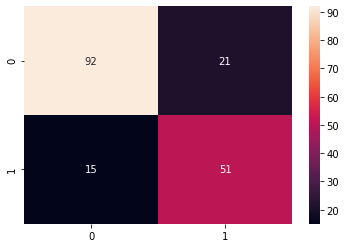

In [916]:
sns.heatmap(confusion_matrix(y_test,y_pred_test), annot=True)

`Saving Model`

In [917]:
with open('Logistic_reg.pickle','wb') as f:
    pickle.dump(log_reg,f)

### `Decision Tree`

In [918]:
dt = DecisionTreeClassifier()

In [948]:
params_dt={ 'class_weight':['balanced','None'],
        'criterion':['entropy','gini'],
        'max_depth':[8,9,10,11,13],
        'min_samples_split':[7,8,9,10,11,12,15],
        'splitter':['best','random']}

In [949]:
grid_search_dt = GridSearchCV(estimator = dt,param_grid = params_dt,cv = 10,scoring = 'f1',return_train_score=True)
grid_search_dt.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced', 'None'],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [8, 9, 10, 11, 13],
                         'min_samples_split': [7, 8, 9, 10, 11, 12, 15],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='f1')

In [950]:
dt_best = grid_search_dt.best_estimator_
dt_best

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=7, splitter='random')

In [951]:
y_pred_train = dt_best.predict(x_train)
y_pred_test = dt_best.predict(x_test)

In [952]:
desn_tree_f1_train = f1_score(y_train,y_pred_train)
desn_tree_f1_test = f1_score(y_test,y_pred_test)
print(f'Training F1 score: {desn_tree_f1_train}')
print(f'TestingF1 score: {desn_tree_f1_test}')

Training F1 score: 0.8181818181818182
TestingF1 score: 0.7913669064748201


<AxesSubplot:>

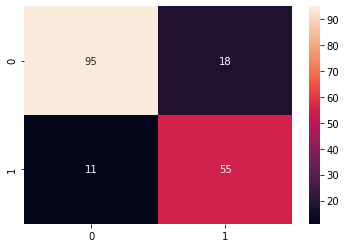

In [953]:
sns.heatmap(confusion_matrix(y_test,y_pred_test), annot=True)

`Saving Model`

In [954]:
with open('Decision_tree.pickle','wb') as f:
    pickle.dump(dt_best,f)

### `Random Forest`

In [963]:
rf = RandomForestClassifier()

In [984]:
params_rf={'n_estimators':[20],
        'class_weight':['balanced','None'], 
        'criterion':['entropy','gini'],
        'max_depth':[6,8,9,12,15],
        'min_samples_split':[8,10,12,13],
        'max_samples':[0.7,0.8,0.9],
       'max_features':[5,6,7]} 

In [985]:
grid_search_rf = GridSearchCV(estimator = rf,param_grid = params_rf,cv = 10,scoring = 'f1',return_train_score=True)
grid_search_rf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'None'],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [6, 8, 9, 12, 15],
                         'max_features': [5, 6, 7],
                         'max_samples': [0.7, 0.8, 0.9],
                         'min_samples_split': [8, 10, 12, 13],
                         'n_estimators': [20]},
             return_train_score=True, scoring='f1')

In [986]:
rf_best = grid_search_rf.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=9, max_features=7, max_samples=0.7,
                       min_samples_split=10, n_estimators=20)

In [987]:
y_pred_train = rf_best.predict(x_train)
y_pred_test = rf_best.predict(x_test)

In [988]:
rand_frst_f1_train = f1_score(y_train,y_pred_train)
rand_frst_f1_test = f1_score(y_test,y_pred_test)
print(f'Training F1 score: {rand_frst_f1_train}')
print(f'Testing F1 score: {rand_frst_f1_test}')

Training F1 score: 0.8560885608856088
Testing F1 score: 0.8444444444444444


In [990]:
confusion_matrix(y_test,y_pred_test)

array([[101,  12],
       [  9,  57]], dtype=int64)

`Saving Model`

In [991]:
with open('Randon_forest.pickle','wb') as f:
    pickle.dump(rf_best,f)

## `Summary`

In [992]:
data = {'Algorithm': ['Logistic Regression', 'Decision Tree','Random Forest'], 
        'Train Score': [logistic_reg_f1_train*100,desn_tree_f1_train*100,rand_frst_f1_train*100],
        'Test Score': [logistic_reg_f1_test*100,desn_tree_f1_test*100,rand_frst_f1_test*100]}
summary = pd.DataFrame(data)
summary

,Algorithm,Train Score,Test Score
0,Logistic Regresion,72.665535,73.913043
1,Decision Tree,81.818182,79.136691
2,Random Forest,85.608856,84.444444
